In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import statistics
from math import sqrt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

In [50]:
data= pd.read_csv('data\Dataset3.csv')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   float64
 1   area              6255 non-null   float64
 2   latitude          6255 non-null   float64
 3   longitude         6255 non-null   float64
 4   Bedrooms          6255 non-null   float64
 5   Bathrooms         6255 non-null   float64
 6   Balcony           6255 non-null   float64
 7   Status            5774 non-null   object 
 8   neworold          6255 non-null   object 
 9   parking           6255 non-null   float64
 10  Furnished_status  3600 non-null   object 
 11  Lift              6255 non-null   float64
 12  type_of_building  6255 non-null   object 
dtypes: float64(9), object(4)
memory usage: 635.4+ KB


In [52]:
data.head(5)

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,2.0,NaN,2.0,Flat
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,NaN,New Property,0.0,Unfurnished,0.0,Flat


In [53]:
data.isna().sum()

price                  0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony                0
Status               481
neworold               0
parking                0
Furnished_status    2655
Lift                   0
type_of_building       0
dtype: int64

In [54]:
data.describe()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift
count,6.255000e+03,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000
mean,2.684187e+07,1185.625260,19.156772,72.868642,2.452278,2.425580,0.821583,0.821583,0.821583
std,2.788831e+07,636.973259,0.109447,0.058614,0.749534,0.762604,1.291957,1.291957,1.291957
min,1.500000e+06,503.000000,18.873713,72.754080,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000e+07,846.500000,19.081509,72.832930,2.000000,2.000000,0.000000,0.000000,0.000000
50%,1.900000e+07,1000.000000,19.147269,72.858019,2.000000,2.000000,0.000000,0.000000,0.000000
75%,3.000000e+07,1300.000000,19.213054,72.884691,3.000000,3.000000,1.000000,1.000000,1.000000
max,3.600000e+08,8000.000000,19.476239,73.197823,10.000000,10.000000,8.000000,8.000000,8.000000


In [55]:
list_ = ['Status', 'Furnished_status']
for i in list_:   
    data [i] = data [i].fillna('unknown')
data.isna().sum()

price               0
area                0
latitude            0
longitude           0
Bedrooms            0
Bathrooms           0
Balcony             0
Status              0
neworold            0
parking             0
Furnished_status    0
Lift                0
type_of_building    0
dtype: int64

In [56]:
data.duplicated().sum()

17

In [57]:
data = data.drop_duplicates()

In [58]:
data.duplicated().sum()

0

In [100]:
data.describe(include='object')

,Status,neworold,Furnished_status,type_of_building
count,6238,6238,6238,6238
unique,3,2,4,2
top,Ready to Move,Resale,unknown,Flat
freq,5754,5500,2641,5812


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6238 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6238 non-null   float64
 1   area              6238 non-null   float64
 2   latitude          6238 non-null   float64
 3   longitude         6238 non-null   float64
 4   Bedrooms          6238 non-null   float64
 5   Bathrooms         6238 non-null   float64
 6   Balcony           6238 non-null   float64
 7   Status            6238 non-null   object 
 8   neworold          6238 non-null   object 
 9   parking           6238 non-null   float64
 10  Furnished_status  6238 non-null   object 
 11  Lift              6238 non-null   float64
 12  type_of_building  6238 non-null   object 
dtypes: float64(9), object(4)
memory usage: 682.3+ KB


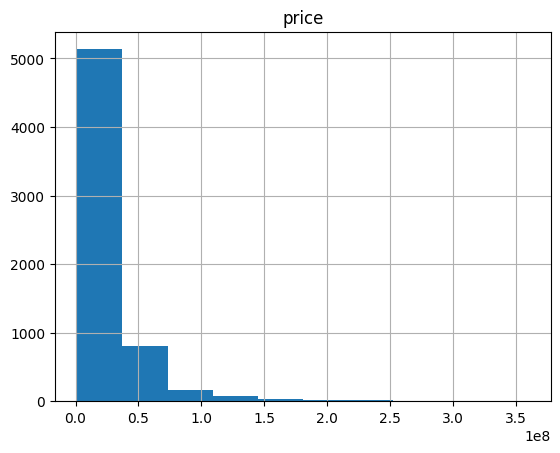

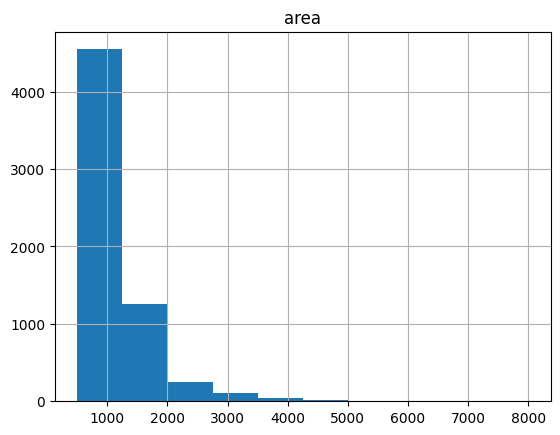

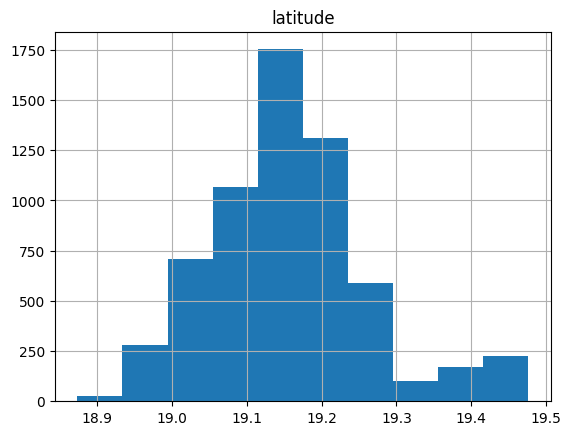

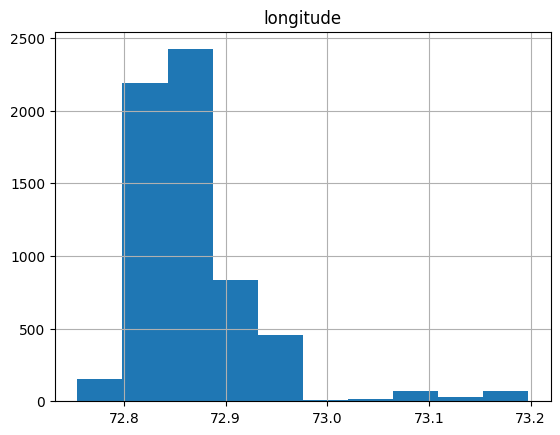

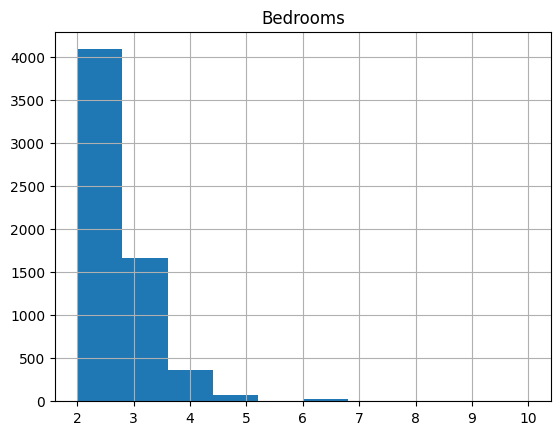

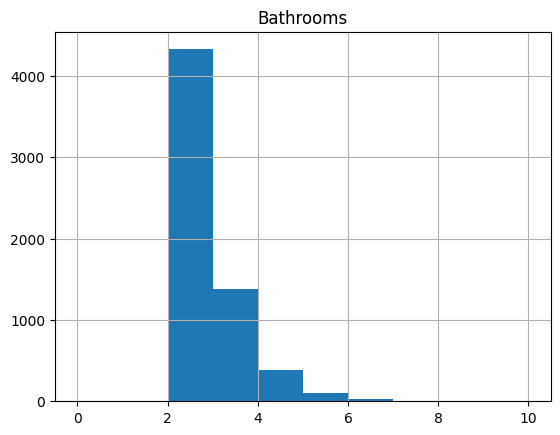

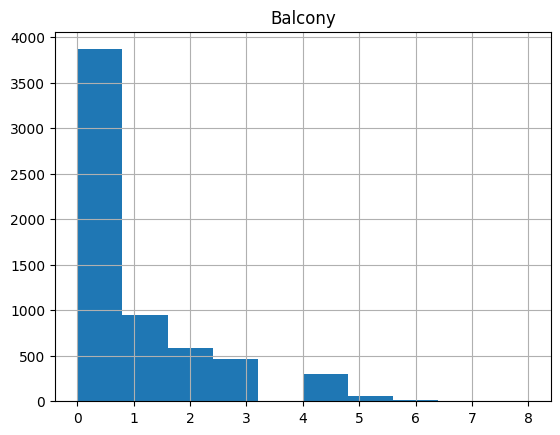

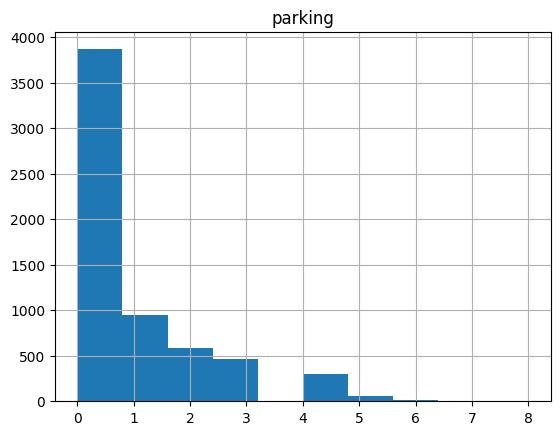

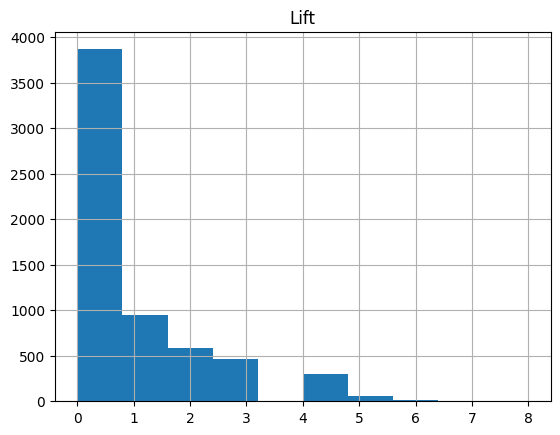

In [60]:
data.describe()[['price', 'area', 'latitude', 'longitude', 'Bedrooms', 'Bathrooms', 'Balcony', 'parking', 'Lift']]
columns = ['price', 'area', 'latitude', 'longitude', 'Bedrooms', 'Bathrooms', 'Balcony', 'parking', 'Lift']

for column in columns:
    data.hist(column)

In [61]:
outlier = data[['price', 'area', 'latitude', 'longitude', 'Bedrooms', 'Bathrooms', 'Balcony', 'parking', 'Lift']]
outlier

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,0.0,0.0
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,0.0,0.0
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,0.0,0.0
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,2.0,2.0
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6250,19500000.0,810.0,19.138320,72.810020,2.0,2.0,0.0,0.0,0.0
6251,22000000.0,1400.0,19.221920,72.854250,3.0,3.0,1.0,1.0,1.0
6252,20000000.0,750.0,19.144320,72.824111,2.0,2.0,0.0,0.0,0.0
6253,11000000.0,700.0,19.047201,72.872225,2.0,2.0,0.0,0.0,0.0


In [62]:
Q1 = outlier.quantile(0.25)
Q1

price        1.300000e+07
area         8.460000e+02
latitude     1.908151e+01
longitude    7.283293e+01
Bedrooms     2.000000e+00
Bathrooms    2.000000e+00
Balcony      0.000000e+00
parking      0.000000e+00
Lift         0.000000e+00
Name: 0.25, dtype: float64

In [63]:
Q3 = outlier.quantile(0.75)
Q3

price        3.000000e+07
area         1.300000e+03
latitude     1.921305e+01
longitude    7.288469e+01
Bedrooms     3.000000e+00
Bathrooms    3.000000e+00
Balcony      1.000000e+00
parking      1.000000e+00
Lift         1.000000e+00
Name: 0.75, dtype: float64

In [64]:
IQR = Q3-Q1
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,0.0,0.0
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,0.0,0.0
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,0.0,0.0
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,2.0,2.0
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6250,19500000.0,810.0,19.138320,72.810020,2.0,2.0,0.0,0.0,0.0
6251,22000000.0,1400.0,19.221920,72.854250,3.0,3.0,1.0,1.0,1.0
6252,20000000.0,750.0,19.144320,72.824111,2.0,2.0,0.0,0.0,0.0
6253,11000000.0,700.0,19.047201,72.872225,2.0,2.0,0.0,0.0,0.0


In [65]:
index_list = list(data_filtered.index.values)
data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,Under Construction,New Property,0.0,unknown,0.0,Flat
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,Under Construction,New Property,0.0,unknown,0.0,Flat
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,Under Construction,New Property,0.0,unknown,0.0,Flat
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,2.0,unknown,2.0,Flat
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,unknown,New Property,0.0,Unfurnished,0.0,Flat


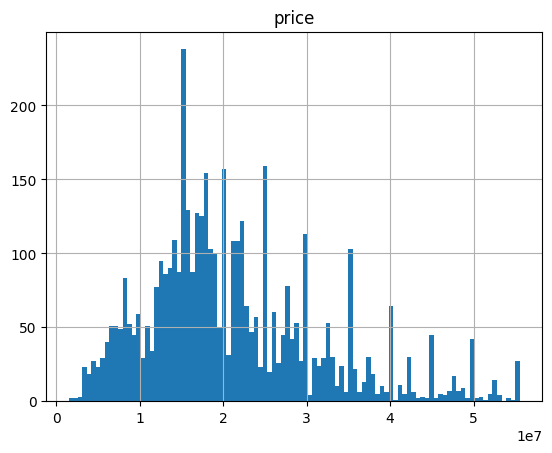

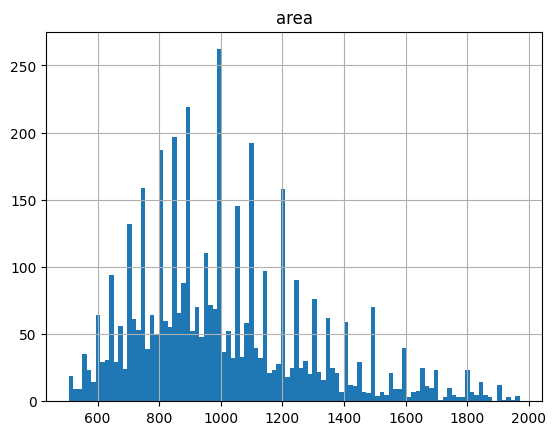

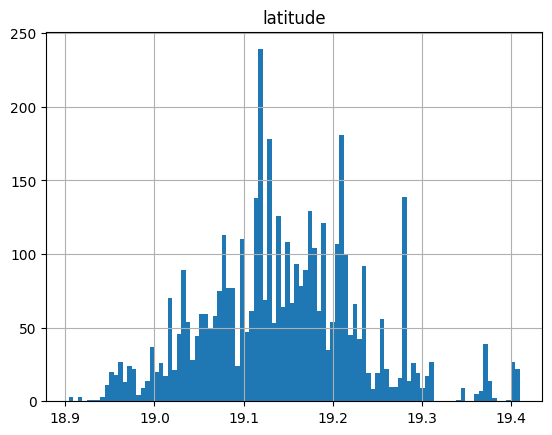

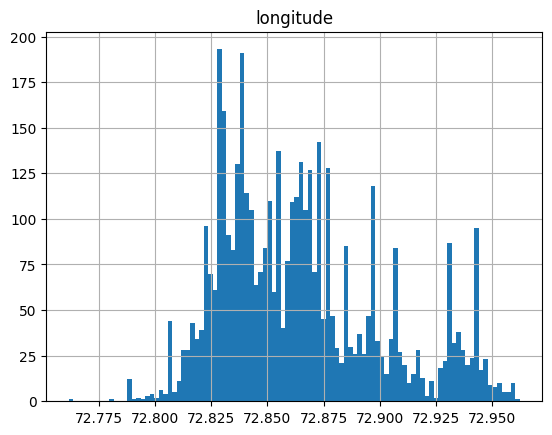

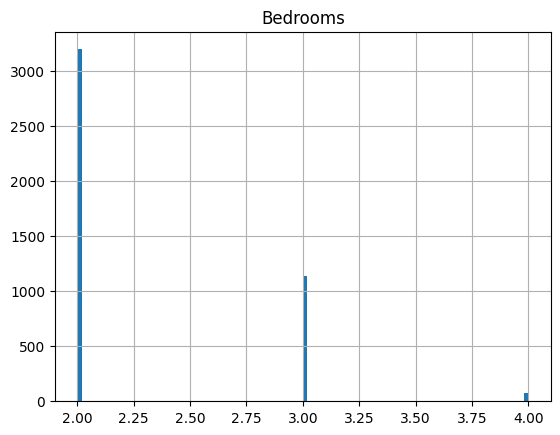

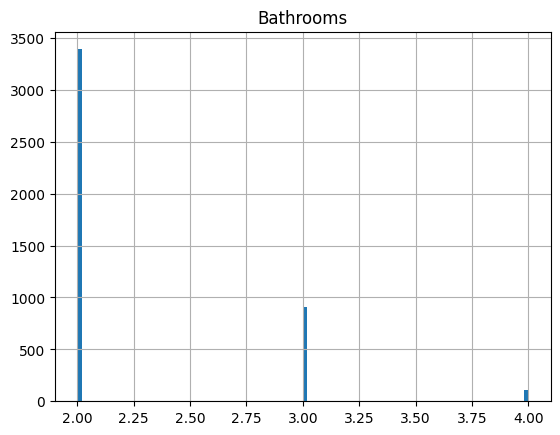

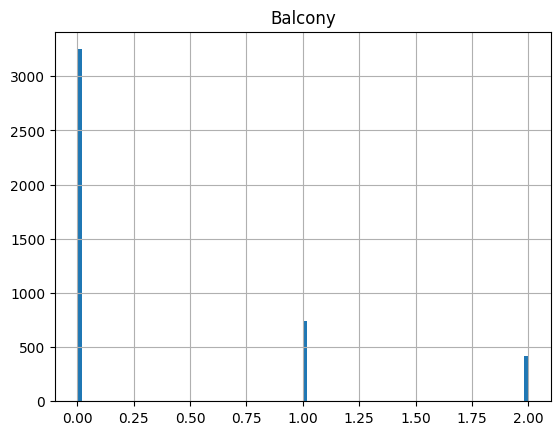

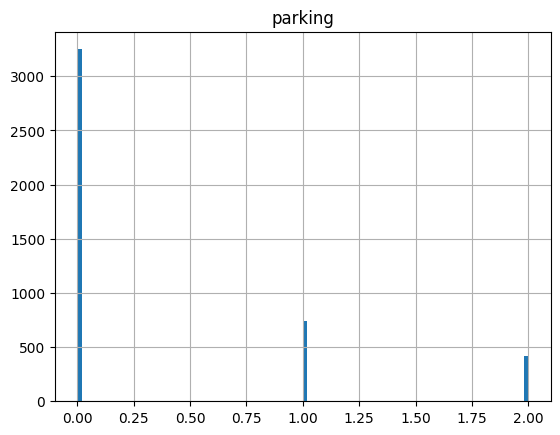

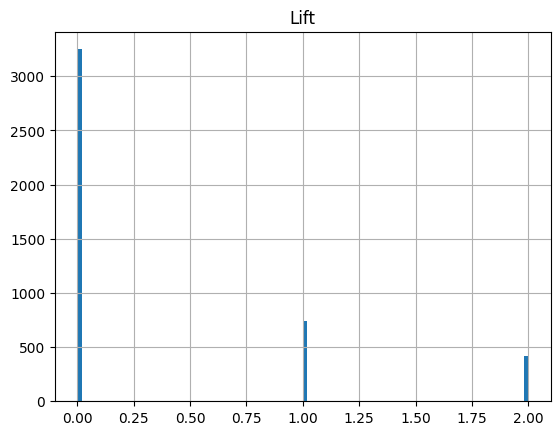

In [66]:
filtered_outlier = data_filtered[['price', 'area', 'latitude', 'longitude', 'Bedrooms', 'Bathrooms', 'Balcony', 'parking', 'Lift']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6238 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6238 non-null   float64
 1   area              6238 non-null   float64
 2   latitude          6238 non-null   float64
 3   longitude         6238 non-null   float64
 4   Bedrooms          6238 non-null   float64
 5   Bathrooms         6238 non-null   float64
 6   Balcony           6238 non-null   float64
 7   Status            6238 non-null   object 
 8   neworold          6238 non-null   object 
 9   parking           6238 non-null   float64
 10  Furnished_status  6238 non-null   object 
 11  Lift              6238 non-null   float64
 12  type_of_building  6238 non-null   object 
dtypes: float64(9), object(4)
memory usage: 682.3+ KB


D:\ForUniversity\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\ForUniversity\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


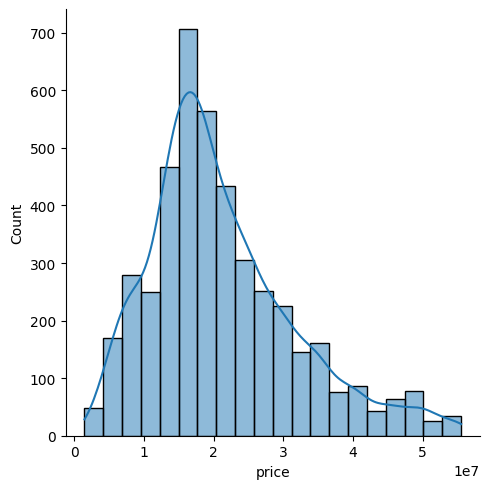

In [217]:
sns.displot(data_filtered["price"],bins=20,kde=True);

In [216]:
Y = data_filtered["price"]
X = data_filtered.drop(["price","Status","neworold","Furnished_status","type_of_building"], axis=1)
Y

0       22400000.0
1       35000000.0
2       31700000.0
3       18700000.0
4       13500000.0
           ...    
6250    19500000.0
6251    22000000.0
6252    20000000.0
6253    11000000.0
6254    15000000.0
Name: price, Length: 4413, dtype: float64

In [190]:
X

,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift
0,629.0,19.032800,72.896357,2.0,2.0,0.0,0.0,0.0
1,974.0,19.032800,72.896357,3.0,2.0,0.0,0.0,0.0
2,968.0,19.085600,72.909277,3.0,3.0,0.0,0.0,0.0
3,629.0,19.155756,72.846862,2.0,2.0,2.0,2.0,2.0
4,1090.0,19.177555,72.849887,2.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6250,810.0,19.138320,72.810020,2.0,2.0,0.0,0.0,0.0
6251,1400.0,19.221920,72.854250,3.0,3.0,1.0,1.0,1.0
6252,750.0,19.144320,72.824111,2.0,2.0,0.0,0.0,0.0
6253,700.0,19.047201,72.872225,2.0,2.0,0.0,0.0,0.0


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3530, 8), (3530,), (883, 8), (883,))

In [116]:
lr = LinearRegression().fit(X_train, y_train)

In [89]:
lr.predict(X_test)

array([ 9889614.85343552, 24485199.82234764, 13696815.55159664,
       33901520.41121483, 29175506.492733  , 27207856.22691631,
       14426472.57528591, 20296580.29514599, 15716445.99613285,
       21555062.01627254, 22290756.50584316, 22285577.15457535,
       31226157.55612087, 19568724.99618149, 20868894.21672726,
       28592256.37090588,  6605850.41726875, 49147752.80716038,
       11895973.74511719, 22483860.49949455, 23312024.94517899,
       33443882.92339706,  9346413.35310268, 22602884.54862881,
       24812277.55981255, 17762260.84649754, 16406125.28959179,
       26002328.24286366, 19016519.24767208, 35188128.96574879,
       32159923.13104439, 24321679.38844776, 21411196.99393749,
       10755640.62488651, 11518910.67174244, 22415190.89703465,
       26462778.34801483, 26266598.77320862, 33616777.18592262,
       20317901.45571136, 11707128.42540646, 36207296.76871872,
       22266700.00766563, 24514239.00001907, 12862118.15190601,
       23897738.20776367, 20866204.80084

In [90]:
y_pred = lr.predict(X_test)

In [241]:
def MSE(y_test, y_pred):
    diff = y_pred-y_test
    diff_squar=diff**2
    mean_diff=diff_squar.mean()
    return mean_diff

In [235]:
def MAE(y_test, y_pred):
    diff = y_pred-y_test
    abs_diff = np.absolute(diff)
    mean_diff = abs_diff.mean()
    return mean_diff

In [246]:
def MAPE(y_test, y_pred):
    mean_diff = np.mean(np.abs((y_test-y_pred)/y_test))*100
    return mean_diff

In [268]:
print(f'MAE: {MAE(y_test, y_pred)}')
print(f'MSE: {MSE(y_test, y_pred)}')
print(f'RMSE: {sqrt(MSE(y_test, y_pred))}')
print(f'MAPE: {sqrt(MAPE(y_test, y_pred))}')
print(f'R^2: {lr.score(X_test, y_test)}')

MAE: 5191224.830698525
MSE: 52590268917729.77
RMSE: 7251914.844903364
MAPE: 5.724995252933877
R^2: 0.5550447020556268


In [92]:
len(lr.coef_)
lr.coef_

array([ 1.25464477e+04, -6.07047972e+07, -5.35991796e+07,  2.29673130e+06,
        2.89733796e+06, -3.78696183e+04, -3.78696183e+04, -3.78696183e+04])

In [248]:
# L1
ridge = Ridge(alpha=0.5).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(f'MAE: {MAE(y_test, y_pred)}')
print(f'MSE: {MSE(y_test, y_pred)}')
print(f'RMSE: {sqrt(MSE(y_test, y_pred))}')
print(f'MAPE: {sqrt(MAPE(y_test, y_pred))}')
print(f'R^2: {ridge.score(X_test, y_test)}')
ridge.coef_

MAE: 5186187.425516403
MSE: 52622677686422.36
RMSE: 7254148.998085327
MAPE: 5.721082759953513
R^2: 0.5547705047861349


array([ 1.25246606e+04, -5.95094149e+07, -4.81483246e+07,  2.26479385e+06,
        2.93812273e+06, -4.13411791e+04, -4.13411791e+04, -4.13411791e+04])

In [249]:
# L2
lasso = Lasso(alpha=0.5).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(f'MAE: {MAE(y_test, y_pred)}')
print(f'MSE: {MSE(y_test, y_pred)}')
print(f'RMSE: {sqrt(MSE(y_test, y_pred))}')
print(f'MAPE: {sqrt(MAPE(y_test, y_pred))}')
print(f'R^2: {lasso.score(X_test, y_test)}')
lasso.coef_

MAE: 5191224.830698525
MSE: 52590268917729.77
RMSE: 7251914.844903364
MAPE: 5.724995252933877
R^2: 0.5550447086153564


array([ 1.25464492e+04, -6.07047251e+07, -5.35987831e+07,  2.29672711e+06,
        2.89733922e+06, -1.13608543e+05, -0.00000000e+00, -0.00000000e+00])

In [96]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [97]:
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

D:\ForUniversity\venv\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.61987e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'alpha': 0.1}

Матрица корреляции

<function matplotlib.pyplot.show(close=None, block=None)>

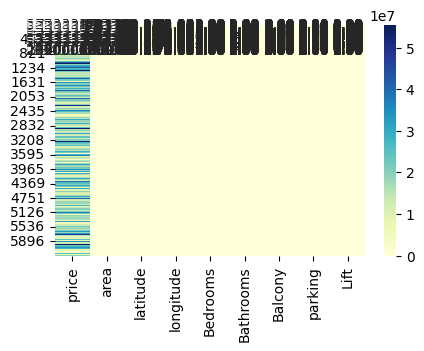

In [170]:
plt.figure(figsize=(5,3))
sns.heatmap(filtered_outlier, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show

In [192]:
for x_pearson in X:
  pearson_coef, p_value = stats.pearsonr(data_filtered[x_pearson], Y)
  print(x_pearson)
  print('Коэффициент корреляции Пирсона = ', pearson_coef, ' P-значение = ', p_value)
  print('')

area
Коэффициент корреляции Пирсона =  0.5066473656780317  P-значение =  1.729960933090483e-286

latitude
Коэффициент корреляции Пирсона =  -0.5317341230942155  P-значение =  1.1136e-320

longitude
Коэффициент корреляции Пирсона =  -0.1382626853925637  P-значение =  2.793846634638602e-20

Bedrooms
Коэффициент корреляции Пирсона =  0.43079255084369855  P-значение =  6.584877564526887e-199

Bathrooms
Коэффициент корреляции Пирсона =  0.43711568890507096  P-значение =  2.1680475522257443e-205

Balcony
Коэффициент корреляции Пирсона =  0.03881414782430366  P-значение =  0.009917828239731825

parking
Коэффициент корреляции Пирсона =  0.03881414782430366  P-значение =  0.009917828239731825

Lift
Коэффициент корреляции Пирсона =  0.03881414782430366  P-значение =  0.009917828239731825



<Axes: xlabel='Bedrooms', ylabel='price'>

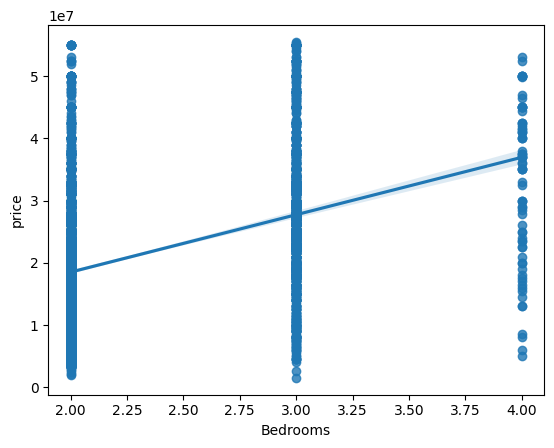

In [193]:
import seaborn as sns
X_1 = data_filtered[['Bedrooms']]
sns.regplot(x = X_1, y = Y)

<Axes: xlabel='Bedrooms', ylabel='price'>

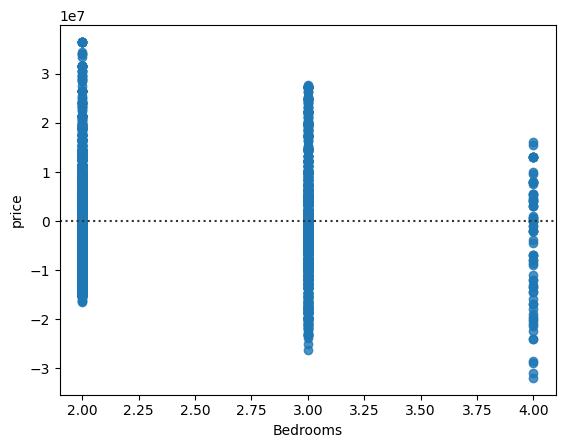

In [194]:
sns.residplot(x=X_1,y=Y)

In [195]:
lm = LinearRegression()
lm

LinearRegression()

In [196]:
lm.fit(X_1,Y)
Yhat_lm = lm.predict(X_1)
Yhat_lm[0:4]

array([18508535.56203221, 27729180.46114286, 27729180.46114286,
       18508535.56203221])

In [250]:
mse_lm = MSE(Y,Yhat_lm)
r_score_lm = r2_score(Y, Yhat_lm)
print(pd.DataFrame([mse_lm, r_score_lm], index=['MSE', 'R^2'], columns=['Метрики качества']))

     Метрики качества
MSE      9.007029e+13
R^2      1.855822e-01


In [251]:
for x in X:
  print(x)
  loop_lm = LinearRegression().fit(data_filtered[[x]], Y)
  print('The intercept = ', loop_lm.intercept_, ' и coefficient = ', loop_lm.coef_)
  Yhat_loop_lm = loop_lm.predict(data_filtered[[x]])
  print('Mean Squared Error = ', MSE(Y, Yhat_loop_lm), ' и R^2= ', r2_score(Y,Yhat_loop_lm))
  print('')

area
The intercept =  2231507.8512824923  и coefficient =  [18730.12996601]
Mean Squared Error =  82205972282960.5  и R^2=  0.2566915531484898

latitude
The intercept =  1227092093.1889243  и coefficient =  [-62985134.68717511]
Mean Squared Error =  79325021958941.61  и R^2=  0.28274117766277473

longitude
The intercept =  2969865822.283091  и coefficient =  [-40467628.24177749]
Mean Squared Error =  108480505484376.94  и R^2=  0.019116570171961667

Bedrooms
The intercept =  67245.76381090656  и coefficient =  [9220644.89911065]
Mean Squared Error =  90070287213758.77  и R^2=  0.18558222186241646

Bathrooms
The intercept =  79919.71977465227  и coefficient =  [9361314.81841896]
Mean Squared Error =  89463354176522.72  и R^2=  0.19107012548696012

Balcony
The intercept =  20980028.099104606  и coefficient =  [629120.503881]
Mean Squared Error =  110428081644581.67  и R^2=  0.001506538071326946

parking
The intercept =  20980028.099104606  и coefficient =  [629120.503881]
Mean Squared Er

Множественная регрессия

In [200]:
mlrm = LinearRegression().fit(X,Y)
mlrm

LinearRegression()

In [201]:
print('intercept = ', mlrm.intercept_, ' и coefficients = ', mlrm.coef_)

intercept =  5051303386.995294  и coefficients =  [ 1.25268803e+04 -6.06160772e+07 -5.34475546e+07  2.48478282e+06
  2.87337320e+06 -1.63942931e+03 -1.63942931e+03 -1.63942931e+03]


C:\Users\liza5\AppData\Local\Temp\ipykernel_22088\2530942519.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 =  sns.distplot(Y, hist=False, color='Red', label='Actual price')
D:\ForUniversity\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\ForUniversity\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with 

<Axes: xlabel='price', ylabel='Density'>

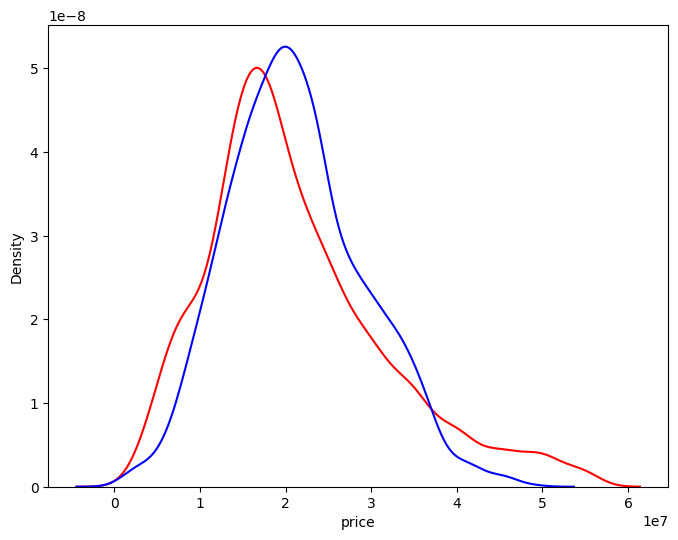

In [202]:
Yhat_mlrm = mlrm.predict(X)

plt.figure(figsize=(8,6))

ax1 =  sns.distplot(Y, hist=False, color='Red', label='Actual price')
sns.distplot(Yhat_mlrm, hist=False, color='Blue', ax=ax1, label='Predicted price')

In [252]:
print('Mean Squared Error = ', MSE(Y, Yhat_mlrm), ' и R^2 = ', r2_score(Y, Yhat_mlrm))

Mean Squared Error =  46706514106881.484  и R^2 =  0.5776785372827422


Полиномиальная регрессия

In [204]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(min(independent_variable)*0.98, max(independent_variable)*1.01, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price')

    plt.show()
    #plt.close()

In [205]:
pol = np.polyfit(data_filtered['longitude'], data_filtered['price'], 5)
func = np.poly1d(pol)
print(func)

           5             4             3             2
9.957e+05 x - 1.016e+08 x - 4.228e+09 x + 3.082e+11 x + 3.929e+13 x - 2.045e+15


D:\ForUniversity\venv\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


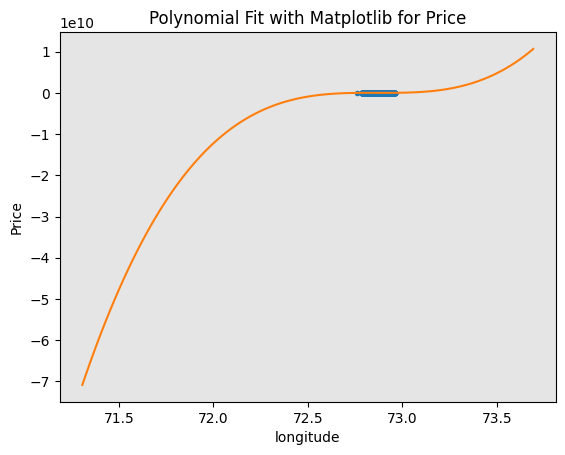

In [206]:
PlotPolly(func, data_filtered['longitude'], data_filtered['price'], 'longitude')

           5             4          3       2
6.487e-08 x - 0.0003868 x + 0.8759 x - 935 x + 4.859e+05 x - 8.454e+07


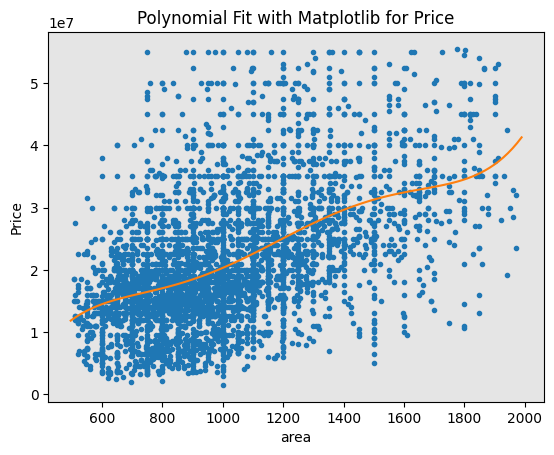

D:\ForUniversity\venv\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


           5            4            3             2
5.012e+07 x - 2.88e+09 x + 3.68e+10 x + 7.029e+11 x - 2.021e+13 x + 1.29e+14


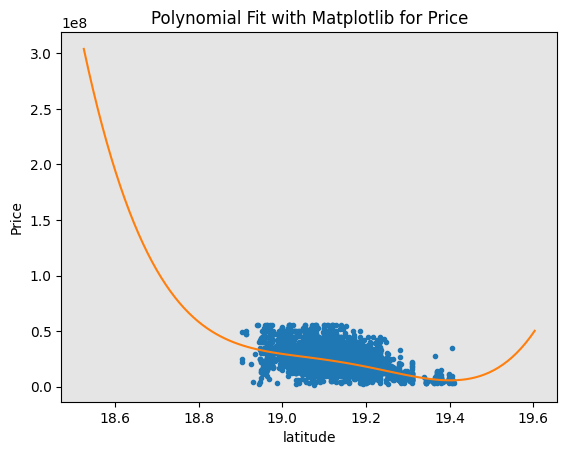

D:\ForUniversity\venv\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


           5             4             3             2
9.957e+05 x - 1.016e+08 x - 4.228e+09 x + 3.082e+11 x + 3.929e+13 x - 2.045e+15


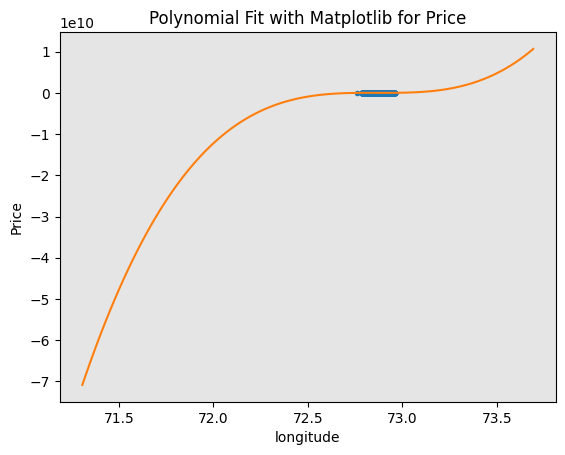

D:\ForUniversity\venv\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


            5            4            3             2
-2.478e+04 x + 1.13e+04 x + 2.78e+05 x + 1.192e+06 x + 3.141e+06 x + 5.744e+06


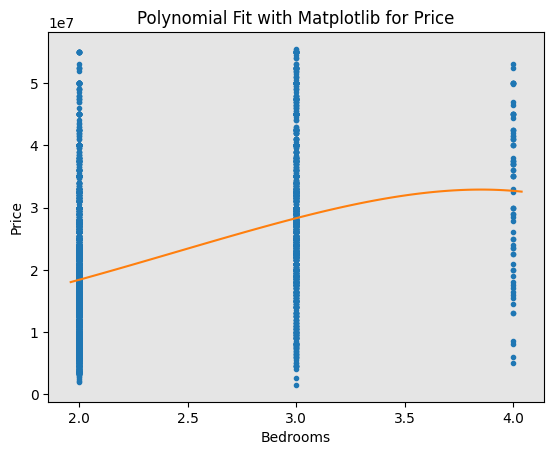

D:\ForUniversity\venv\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


           5        4             3             2
-3.01e+04 x + 7293 x + 3.295e+05 x + 1.409e+06 x + 3.316e+06 x + 4.582e+06


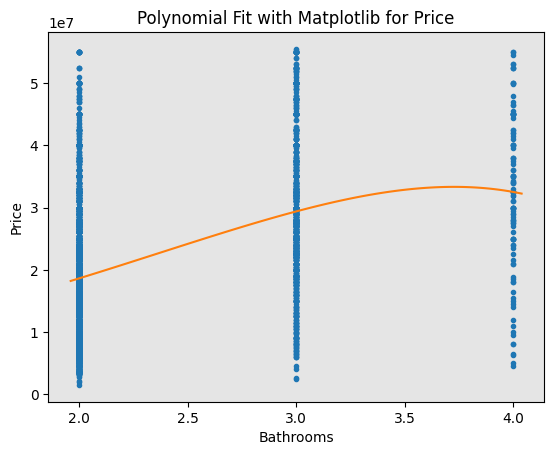

D:\ForUniversity\venv\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


            5            4             3             2
-3.472e+04 x - 5.12e+04 x - 3.029e+04 x + 2.033e+05 x + 1.112e+06 x + 2.092e+07


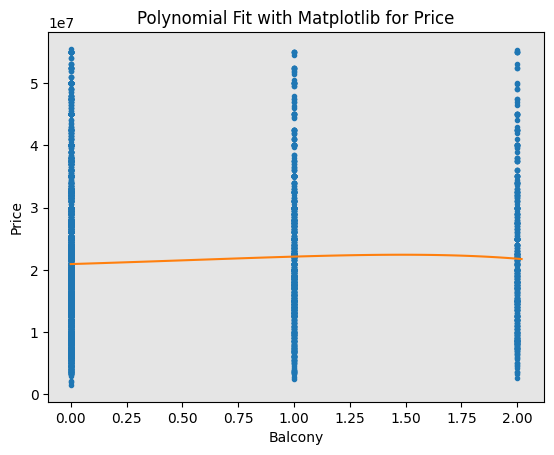

D:\ForUniversity\venv\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


            5            4             3             2
-3.472e+04 x - 5.12e+04 x - 3.029e+04 x + 2.033e+05 x + 1.112e+06 x + 2.092e+07


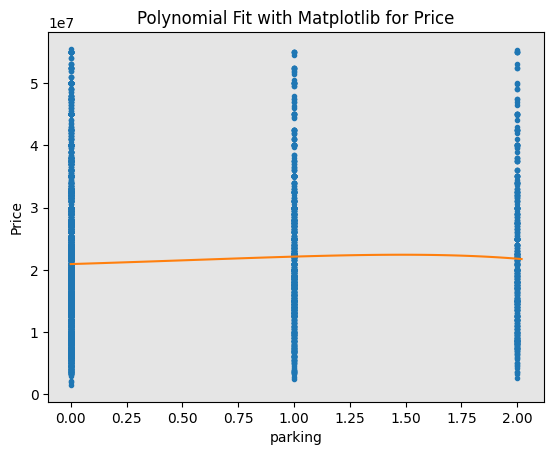

D:\ForUniversity\venv\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


            5            4             3             2
-3.472e+04 x - 5.12e+04 x - 3.029e+04 x + 2.033e+05 x + 1.112e+06 x + 2.092e+07


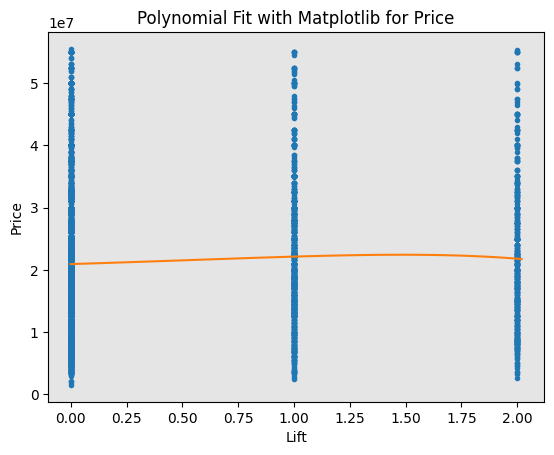

In [207]:
for x in X:
  pol_loop = np.polyfit(data_filtered[x], data_filtered['price'], 5)
  func_loop = np.poly1d(pol_loop)
  print(func_loop)
  plt.figure()
  PlotPolly(func_loop, data_filtered[x], Y, Name=x)
  plt.show()

Пайплайн

In [209]:
Input = [('standardscaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', LinearRegression()) ]

In [210]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [211]:
pipe.fit(X, Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [212]:
Yhat_pipe = pipe.predict(X)
Yhat_pipe[0:4]

array([15442292.9068757 , 23356033.20308129, 25551092.56402744,
       14542364.94678507])

C:\Users\liza5\AppData\Local\Temp\ipykernel_22088\3577989603.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(Y, hist=False, color='Red', label='Actual values')
D:\ForUniversity\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\ForUniversity\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with 

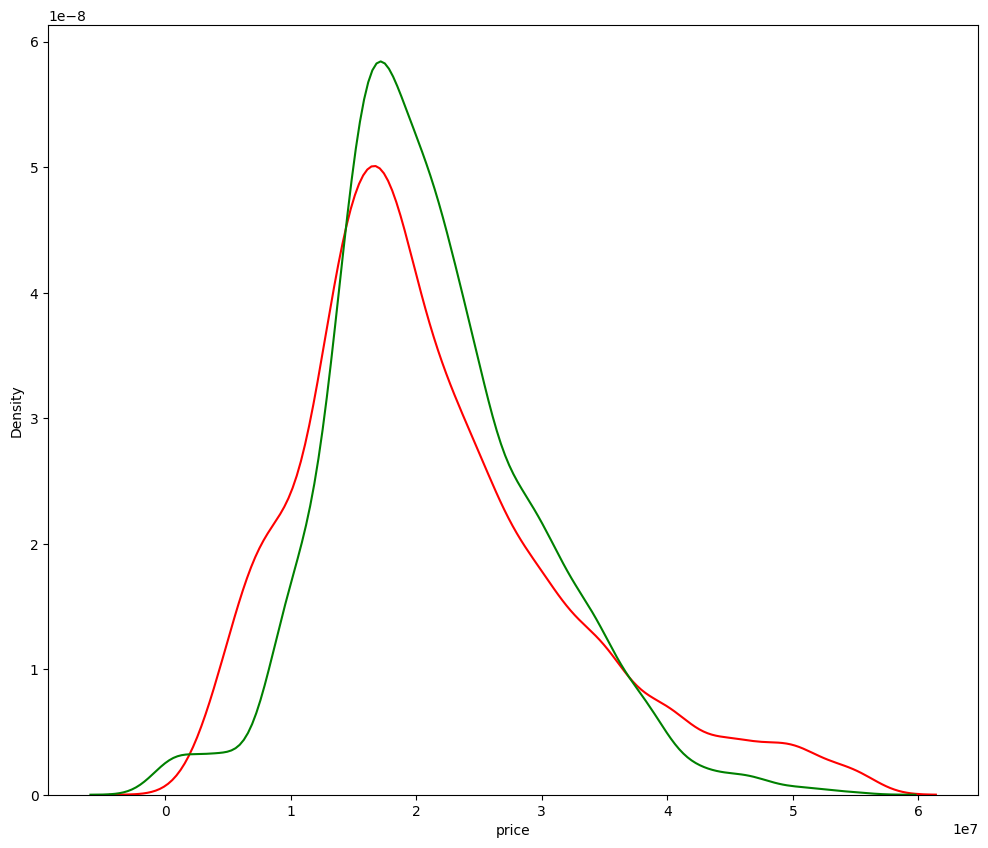

In [213]:
plt.figure(figsize=(12,10))
ax2 = sns.distplot(Y, hist=False, color='Red', label='Actual values')
sns.distplot(Yhat_pipe, hist=False, color='Green', label='Predicted values')
plt.show()

In [253]:
print("Mean Squared Error для Полиномиальной множественной линейной регрессии = ",
      MSE(Y, Yhat_pipe), ' R^2 = ', r2_score(Y, Yhat_pipe))

Mean Squared Error для Полиномиальной множественной линейной регрессии =  43026781480240.586  R^2 =  0.6109507712528308


In [214]:
Y_pred = pd.DataFrame(data=Yhat_pipe, columns=['Price_'])
prediction_df = pd.concat([Y_pred,Y], axis=1)
prediction_df

,Price_,price
0,1.544229e+07,22400000.0
1,2.335603e+07,35000000.0
2,2.555109e+07,31700000.0
3,1.454236e+07,18700000.0
4,1.989052e+07,13500000.0
...,...,...
6250,NaN,19500000.0
6251,NaN,22000000.0
6252,NaN,20000000.0
6253,NaN,11000000.0


ElasticNet

In [221]:
base_elastic_model = ElasticNet(max_iter=100000)

In [222]:
param_grid = {'alpha':[0.1,1,10,100],'l1_ratio':[0.1,0.75,0.99,1]}

In [225]:
grid_model = GridSearchCV(base_elastic_model,
                          param_grid=param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5, verbose = 2)

In [226]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s
[CV] END ...........................alpha=0.1, l

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.75, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [227]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [228]:
y_pred = grid_model.predict(X_test)

In [254]:
MSE(y_test,y_pred)

52590268917729.77

In [255]:
np.sqrt(MSE(y_test,y_pred))

7251914.844903364

In [231]:
np.mean(data_filtered['price'])

21205986.85701337

In [256]:
R2= round(r2_score(y_test, y_pred),2)
R2

0.56